In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np

Removing Unnecessary features

In [ ]:
nasa = pd.read_csv("nasa.csv")
del nasa['Name']
del nasa['Neo Reference ID']
del nasa["Close Approach Date"]
del nasa ["Orbit Determination Date"]
del nasa["Orbiting Body"]
del nasa['Est Dia in Feet(max)']
del nasa['Est Dia in Feet(min)']
del nasa['Est Dia in M(max)']
del nasa['Est Dia in Miles(max)']
del nasa['Est Dia in Miles(min)']
del nasa['Miles per hour']
del nasa['Relative Velocity km per sec']
del nasa['Equinox']
del nasa['Epoch Date Close Approach']
del nasa['Miss Dist.(Astronomical)']
del nasa['Miss Dist.(lunar)']
del nasa['Epoch Osculation']
del nasa['Perihelion Time']

In [ ]:
nasa.head(10)

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Relative Velocity km per hr,Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,22017.003799,62753692.0,38993336.0,17,5,0.025282,4.634,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,65210.346095,57298148.0,35603420.0,21,3,0.186935,5.457,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,27326.560182,7622911.5,4736657.5,22,0,0.043058,4.557,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,40225.948191,42683616.0,26522368.0,7,6,0.005512,5.093,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,35426.991794,61010824.0,37910368.0,25,1,0.034798,5.154,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,135.142133,0.726395,True
5,19.6,0.319562,0.714562,319.561887,38911.838251,58759768.0,36511628.0,40,1,0.272213,4.724,0.563441,1.323532,17.927751,178.971951,556.160556,0.577800,198.145969,2.069265,354.237368,0.647295,False
6,19.6,0.319562,0.714562,319.561887,38911.829716,58759532.0,36511480.0,43,1,0.272213,4.724,0.563441,1.323532,17.927748,178.971953,556.160544,0.577800,198.145960,2.069265,354.237396,0.647295,False
7,19.2,0.384198,0.859093,384.197891,87918.782382,19324928.0,12007954.0,22,0,0.098758,4.921,0.449763,1.237475,34.695127,112.562984,502.808758,0.680905,288.374651,1.794045,186.776932,0.715978,False
8,17.8,0.732074,1.636967,732.073989,62545.621813,53598364.0,33304478.0,100,0,0.109354,5.386,0.238179,1.145551,22.215210,80.211132,447.837013,0.872705,353.422394,1.418397,182.236432,0.803864,False
9,21.5,0.133216,0.297879,133.215567,46438.594999,22709816.0,14111226.0,30,0,0.016907,6.623,0.551389,0.876125,2.059577,2.613682,299.535161,0.393040,253.765937,1.359211,119.861382,1.201862,True


Calculating Number of positive and negative samples

<BarContainer object of 2 artists>

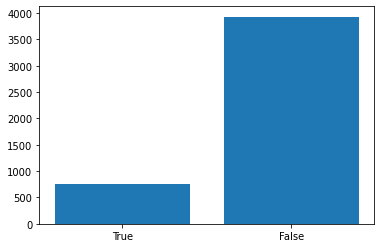

In [ ]:
import matplotlib.pyplot as plt
true_samples = np.sum(nasa['Hazardous'] == True)
false_samples = np.sum(nasa['Hazardous']==False)
plt.bar(["True","False"],height = [true_samples,false_samples])

Importing necessary packages

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import train_test_split
import sklearn
import numpy as np

Extracting out the True samples using boolean mask

In [ ]:
nasa_true_mask = nasa['Hazardous'] ==True
nasa_true = nasa[nasa_true_mask]
len(nasa_true)

755

In [ ]:
np.array(nasa).shape

(4687, 22)

Using Bootstrapping to balance dataset

In [ ]:
bootstrap = nasa_true.sample(3177,replace=True)
    
nasa = nasa.append(bootstrap)


Labelling the Data

In [ ]:
X,y = nasa.iloc[:,0:21],nasa.iloc[:,21]

Scaler = sklearn.preprocessing.StandardScaler()
Scaler.fit(X)
X = Scaler.transform(X)

binary = sklearn.preprocessing.LabelBinarizer(pos_label=1,neg_label=0)
lb = binary.fit(y)
y = lb.transform(y)

Splitting the data into train and test 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

Fitting various models

In [ ]:
fitted_log =  LogisticRegression(solver='liblinear').fit(x_train,y_train)
fitted_sgd = SGDClassifier(loss='log').fit(x_train,y_train)
svm = sklearn.svm.SVC().fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("for logistic regression: ",fitted_log.score(x_test,y_test))
print("for sgd classifier: ",fitted_sgd.score(x_test,y_test))
print("for svm classifier: ",svm.score(x_test,y_test))

for logistic regression:  0.9396058486967578
for sgd classifier:  0.9389701207883026
for svm classifier:  0.9624920534011443


In [ ]:
y_pred = fitted_log.predict(x_test)

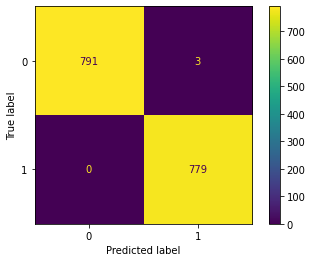

In [ ]:
sklearn.metrics.plot_confusion_matrix(xgb,x_test, y_test,labels=None, sample_weight=None, normalize=None,values_format = '.5g')

Metrics for Logistic Regression

In [ ]:
import sklearn
recall = sklearn.metrics.recall_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test,y_pred)
f1_score = (2*precision*recall)/(precision+recall)
print("The Precision is: ",precision)
print("The Recall is: ",recall)
print("The F1 Score is: ",f1_score)

The Precision is:  0.9182389937106918
The Recall is:  0.948051948051948
The F1 Score is:  0.9329073482428114


Using Random Forest  Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=128,bootstrap=False)
fitted_rf  = rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
recall = sklearn.metrics.recall_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test,y_pred)
f1_score = (2*precision*recall)/(precision+recall)
print("The Precision is: ",precision)
print("The Recall is: ",recall)
print("The F1 Score is: ",f1_score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Using XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=128,bootstrap=False)
xgb_fit = xgb.fit(x_train,y_train)
y_pred1 = xgb.predict(x_test)
recall = sklearn.metrics.recall_score(y_test, y_pred1)
precision = sklearn.metrics.precision_score(y_test,y_pred1)
f1_score = (2*precision*recall)/(precision+recall)
print("The Precision is: ",precision)
print("The Recall is: ",recall)
print("The F1 Score is: ",f1_score)
print("The Accuracy is:",xgb_fit.score(x_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Building a Deep Neural Network

In [ ]:
from keras.layers import Dense,Input
from keras.models import Model

def asteroid(input_shape=(21,)):

  X_input = Input(shape=input_shape)
  X = Dense(units=16,activation='relu')(X_input)
  X = Dense(units=8,activation="relu")(X)
  X = Dense(units=1,activation='sigmoid')(X)

  model = Model(inputs=X_input,outputs=X)

  return model

In [ ]:
asteroid = asteroid()

In [ ]:
import keras.backend as K
def f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val,precision,recall
def precision(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    return precision   
def recall(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    return recall   

In [ ]:
asteroid.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy',f1,precision,recall])

Training Neural Network

In [ ]:
asteroid.fit(x=x_train,y=y_train,epochs=100)

Epoch 1/100
197/197 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5484 - f1: 0.5633 - precision: 0.5777 - recall: 0.5582
Epoch 2/100
197/197 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.8081 - f1: 0.8065 - precision: 0.8092 - recall: 0.8073
Epoch 3/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2410 - accuracy: 0.9111 - f1: 0.9138 - precision: 0.8867 - recall: 0.9433
Epoch 4/100
197/197 [==============================] - 0s 1ms/step - loss: 0.1366 - accuracy: 0.9512 - f1: 0.9526 - precision: 0.9327 - recall: 0.9736
Epoch 5/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0993 - accuracy: 0.9649 - f1: 0.9655 - precision: 0.9454 - recall: 0.9867
Epoch 6/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9693 - f1: 0.9698 - precision: 0.9551 - recall: 0.9853
Epoch 7/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0699 - accuracy: 

In [ ]:
y_pred = asteroid.predict(x=x_test)

Plotting Confusion Matrix for Neural Network

In [ ]:
for i in range(len(y_pred)):

  if (y_pred[i] >= 0.5):
    y_pred[i]=1
  else :
    y_pred[i] = 0
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
import seaborn
seaborn.heatmap(matrix,annot=True,fmt='d')